In [1]:
#####Capstone RMBS model Spring 2021 for Springboard Data Science Track #####

In [2]:
###Load required pacakages

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
import warnings
import seaborn as sns

import scipy.stats as stats
import sklearn

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
#EDA data filepath downloaded and stored here
filename = 'C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/data_frame_for_EDA.csv'

In [5]:
load=pd.read_csv(filename, header =0, index_col=['Loan_Sequence_Number','Monthly_Reporting_Period'])

In [6]:
test_df =load

In [7]:
test_df['Modification_Flag'].replace(to_replace=np.nan,value='N', inplace=True)

In [8]:
test_df['Target_Performance_Variable'].replace(to_replace='Non-Default',value='Current', inplace=True)

In [9]:
test_df['Target_Performance_Variable'].replace(to_replace='Repurchase',value='Default', inplace=True)

In [10]:
test_df['previous_period'] = test_df['Target_Performance_Variable'].groupby('Loan_Sequence_Number').shift(1, axis=0)

In [11]:
test_df['previous_period'].replace(to_replace=np.nan,value='Current', inplace=True)

In [12]:
#test_df['previous_period'].replace(to_replace=0,value='Current', inplace=True)

In [13]:
test_df = test_df.reset_index()

In [14]:
test_df = test_df[test_df['Monthly_Reporting_Period']=='2004-01-01']

In [15]:
drop_cols =['Loan_Sequence_Number', 
            'Monthly_Reporting_Period', 
            'Current_Actual_UPB', 
            'Current_Loan_Delinquency_Status', 
            'Remaining_Months_to_Legal_Maturity',
            'Actual_Loss_Calculation', 
            'Zero_Balance_Code',
            'Zero_Balance_Removal_UPB',
            'Current_Deferred_UPB',
            'CS_HPA_20_cities', 'UNEMPLOY',
            'Y30_fixed_mortgage_rate', 
            'Credit_Score', 
            'First_Payment_Date', 
            'First_Time_Homebuyer_Flag', 
            'Maturity_Date', 
            'MSA', 
            'MI%',
            'Original_Interest_Rate', 
            'Channel', 
            'Prepayment_Penalty_Flag', 
            'Property_State', 
            'Property_Type', 
            'Loan_Purpose', 
            'Original_Loan_Term', 
            'Number_of_Borrowers', 
            'Seller_Name', 
            'Servicer_Name', 
            'Super_Conforming_Flag', 
            'Orig_Year', 
            'numeric_Loan_Delinquency_Status', 
            'consol_Loan_Delinquency_Status',
            'Original_LTV',
            'Original_CLTV',
            'Ever_Default', 
            'prin_repay_pct','CS_HP',
            'LF_Part', 'Y10_CMT']

In [16]:
test_df.drop(labels=drop_cols, axis=1, inplace=True)

In [17]:
test_df.columns.values

array(['Loan_Age', 'Modification_Flag', 'Current_Interest_Rate',
       'Number_of_Units', 'Occupancy_Status', 'Original_DTI',
       'Original_UPB', 'Target_Performance_Variable', 'HPA_adjusted_LTV',
       'previous_period'], dtype=object)

In [18]:
test_df.shape

(40929, 10)

In [19]:
test_df['Target_Performance_Variable'].unique()

array(['Current', '1m_DQ', '5m_DQ', '7m_to_12m_DQ', '2m_DQ', '3m_DQ',
       'REO', '4m_DQ', '6m_DQ', 'Default', '13m_to_24m_DQ', '>24m_DQ'],
      dtype=object)

In [20]:
test_df['previous_period'].unique()

array(['Current', '1m_DQ', '4m_DQ', '6m_DQ', '2m_DQ', '3m_DQ', '5m_DQ',
       '7m_to_12m_DQ', '13m_to_24m_DQ', 'REO', '>24m_DQ'], dtype=object)

In [21]:
test_df.to_csv('C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/test2.csv')

In [22]:
pp_mapping ={'Current' :1,
'1m_DQ' : 2,
'2m_DQ' : 3,
'3m_DQ' : 4,
'4m_DQ' : 5,
'5m_DQ' : 6,
'6m_DQ' : 7,
'7m_to_12m_DQ' : 8,
'13m_to_24m_DQ' : 9,               
'REO' : 10}

In [23]:
test_df['previous_period']=test_df['previous_period'].map(pp_mapping)

In [24]:
df=pd.DataFrame(test_df)

In [25]:
df = pd.get_dummies(df,drop_first=True)

In [26]:
target_variables=['Target_Performance_Variable_1m_DQ',
       'Target_Performance_Variable_2m_DQ',
       'Target_Performance_Variable_3m_DQ',
       'Target_Performance_Variable_4m_DQ',
       'Target_Performance_Variable_5m_DQ',
       'Target_Performance_Variable_6m_DQ',
       'Target_Performance_Variable_7m_to_12m_DQ',
       'Target_Performance_Variable_Current',
       'Target_Performance_Variable_Default',
       'Target_Performance_Variable_REO']

In [27]:
df.head()

,Loan_Age,Current_Interest_Rate,Number_of_Units,Original_DTI,Original_UPB,HPA_adjusted_LTV,previous_period,Modification_Flag_Y,Occupancy_Status_P,Occupancy_Status_S,...,Target_Performance_Variable_2m_DQ,Target_Performance_Variable_3m_DQ,Target_Performance_Variable_4m_DQ,Target_Performance_Variable_5m_DQ,Target_Performance_Variable_6m_DQ,Target_Performance_Variable_7m_to_12m_DQ,Target_Performance_Variable_>24m_DQ,Target_Performance_Variable_Current,Target_Performance_Variable_Default,Target_Performance_Variable_REO
153,15.0,6.125,1,40,106000,84.452718,1.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
194,18.0,6.750,1,27,96000,68.412834,1.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
204,6.0,6.000,1,18,202000,54.411856,1.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
648,22.0,8.500,1,25,65000,70.194839,1.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
979,4.0,5.375,1,22,200000,63.972557,1.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
df.to_csv('C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/test3.csv')

In [29]:
numerical_features = ['Loan_Age','Current_Interest_Rate','Number_of_Units','Original_DTI','Original_UPB','HPA_adjusted_LTV','previous_period']

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [feature for feature in numerical_features]
mms = MinMaxScaler()
scaled = mms.fit_transform(df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

df.reset_index(inplace=True, drop=True)

# Replace original columns with scaled ones
for feature in numerical_features:
    df[feature] = scaled[feature]
    
df.head()

,Loan_Age,Current_Interest_Rate,Number_of_Units,Original_DTI,Original_UPB,HPA_adjusted_LTV,previous_period,Modification_Flag_Y,Occupancy_Status_P,Occupancy_Status_S,...,Target_Performance_Variable_2m_DQ,Target_Performance_Variable_3m_DQ,Target_Performance_Variable_4m_DQ,Target_Performance_Variable_5m_DQ,Target_Performance_Variable_6m_DQ,Target_Performance_Variable_7m_to_12m_DQ,Target_Performance_Variable_>24m_DQ,Target_Performance_Variable_Current,Target_Performance_Variable_Default,Target_Performance_Variable_REO
0,0.254237,0.569767,0.0,0.609375,0.166078,0.844393,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.305085,0.627907,0.0,0.406250,0.148410,0.683856,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.101695,0.558140,0.0,0.265625,0.335689,0.543725,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.372881,0.790698,0.0,0.375000,0.093640,0.701691,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.067797,0.500000,0.0,0.328125,0.332155,0.639415,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(target_variables, axis=1)

for feature in target_variables:

    y = df[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=125)
    print(feature)
    print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
    % Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')
    print ('_________')


Target_Performance_Variable_1m_DQ
% Positive class in Train = 1.71
    % Positive class in Test  = 1.65
_________
Target_Performance_Variable_2m_DQ
% Positive class in Train = 0.37
    % Positive class in Test  = 0.36
_________
Target_Performance_Variable_3m_DQ
% Positive class in Train = 0.22
    % Positive class in Test  = 0.18
_________
Target_Performance_Variable_4m_DQ
% Positive class in Train = 0.11
    % Positive class in Test  = 0.11
_________
Target_Performance_Variable_5m_DQ
% Positive class in Train = 0.12
    % Positive class in Test  = 0.13
_________
Target_Performance_Variable_6m_DQ
% Positive class in Train = 0.07
    % Positive class in Test  = 0.06
_________
Target_Performance_Variable_7m_to_12m_DQ
% Positive class in Train = 0.21
    % Positive class in Test  = 0.25
_________
Target_Performance_Variable_Current
% Positive class in Train = 97.02
    % Positive class in Test  = 97.1
_________
Target_Performance_Variable_Default
% Positive class in Train = 0.06
    % Pos

In [32]:
df.isna().sum()

Loan_Age                                    0
Current_Interest_Rate                       0
Number_of_Units                             0
Original_DTI                                0
Original_UPB                                0
HPA_adjusted_LTV                            0
previous_period                             3
Modification_Flag_Y                         0
Occupancy_Status_P                          0
Occupancy_Status_S                          0
Target_Performance_Variable_1m_DQ           0
Target_Performance_Variable_2m_DQ           0
Target_Performance_Variable_3m_DQ           0
Target_Performance_Variable_4m_DQ           0
Target_Performance_Variable_5m_DQ           0
Target_Performance_Variable_6m_DQ           0
Target_Performance_Variable_7m_to_12m_DQ    0
Target_Performance_Variable_>24m_DQ         0
Target_Performance_Variable_Current         0
Target_Performance_Variable_Default         0
Target_Performance_Variable_REO             0
dtype: int64

In [33]:
#temp fix
df.dropna(inplace=True)

Accuracy = 0.98
Recall = 0.00

Accuracy = 1.00
Recall = 0.00

Accuracy = 1.00
Recall = 0.00

Accuracy = 1.00
Recall = 0.00

Accuracy = 1.00
Recall = 0.00

Accuracy = 1.00
Recall = 0.00

Accuracy = 1.00
Recall = 0.08

Accuracy = 0.98
Recall = 1.00

Accuracy = 1.00
Recall = 0.33

Accuracy = 1.00
Recall = 0.00



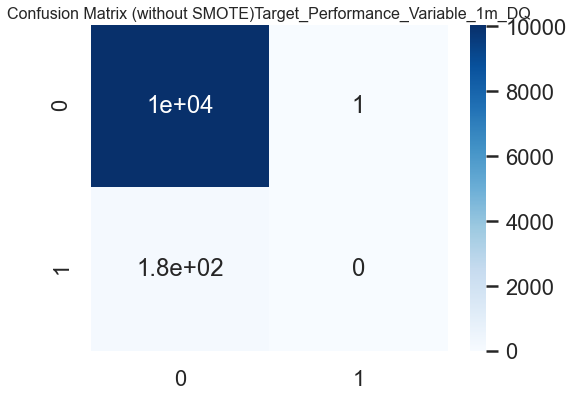

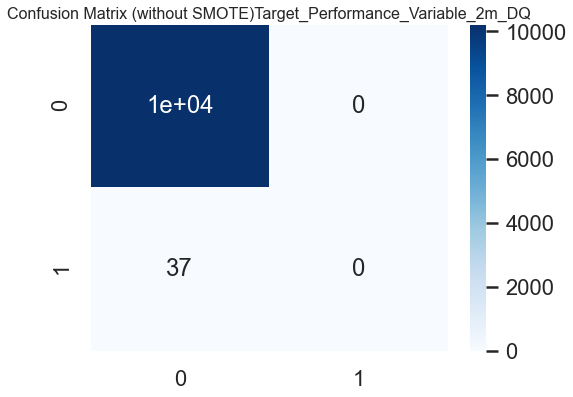

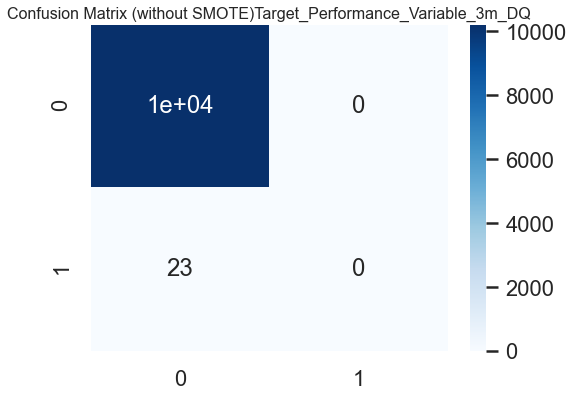

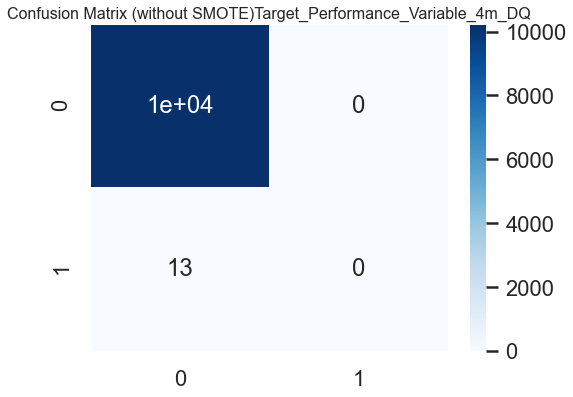

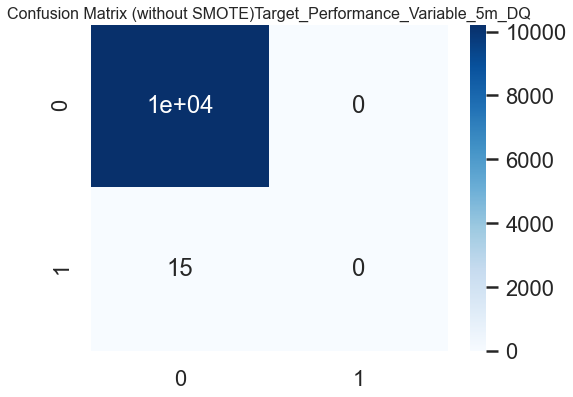

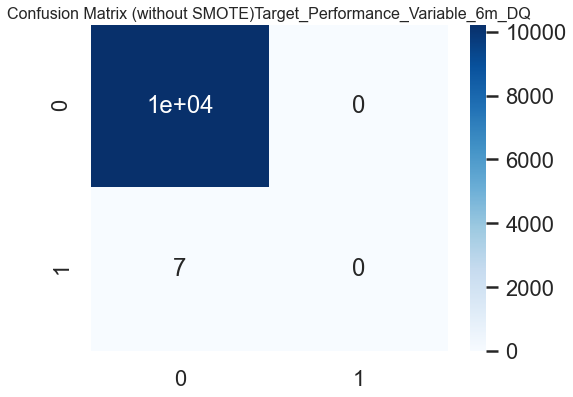

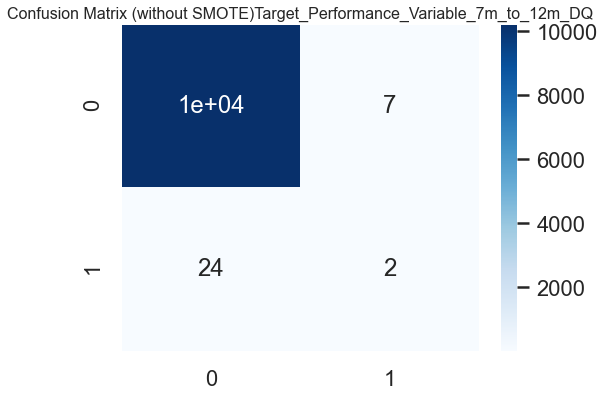

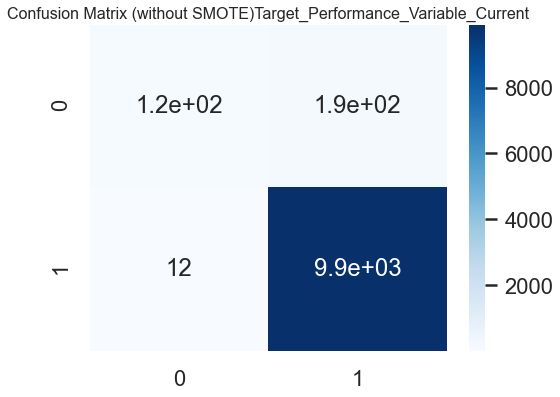

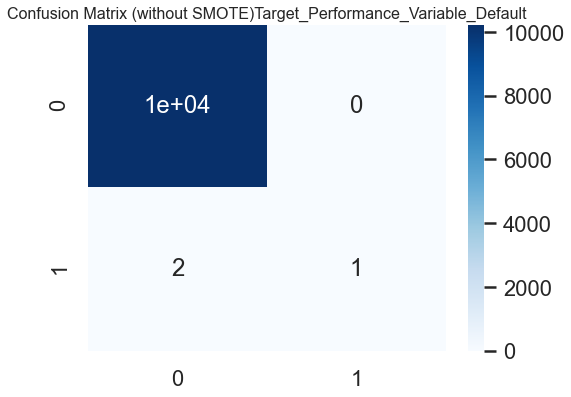

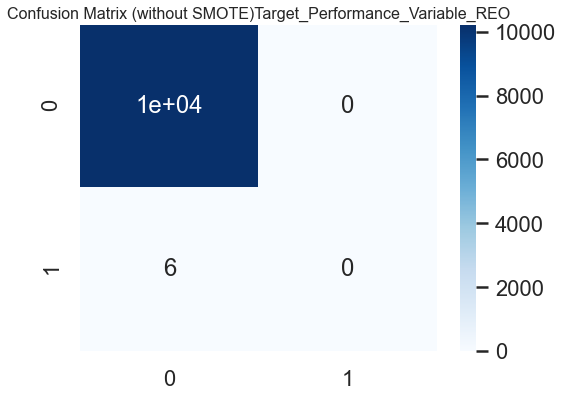

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

X = (df.drop(target_variables, axis=1))

for feature in target_variables:

    y = df[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
    # Train
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Evaluate
    print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix (without SMOTE)' + feature, size=16)
    sns.heatmap(cm, annot=True, cmap='Blues');

In [35]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=123)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (40926, 11)
Shape of X after SMOTE: (81806, 11)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Target_Performance_Variable_REO, dtype: float64

In [36]:
from imblearn.over_sampling import SMOTE 

for feature in target_variables:

    sm = SMOTE(random_state=123)
    y=df[feature]
    X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (40926, 11)
Shape of X after SMOTE: (81806, 11)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Target_Performance_Variable_REO, dtype: float64

Target_Performance_Variable_1m_DQ
Accuracy = 0.779230
Recall = 0.697481

_________
                                             coef
previous_period                      2.929108e+08
Current_Interest_Rate                3.754538e+03
HPA_adjusted_LTV                     1.408059e+01
Modification_Flag_Y                  3.448226e+00
Loan_Age                             2.189528e+00
Original_DTI                         1.882163e+00
Occupancy_Status_P                   1.530813e+00
Original_UPB                         1.425288e+00
Target_Performance_Variable_>24m_DQ  1.000000e+00
Number_of_Units                      8.673683e-01
Occupancy_Status_S                   7.900534e-01
_________
Target_Performance_Variable_2m_DQ
Accuracy = 0.982588
Recall = 0.988264

_________
                                             coef
previous_period                      1.686477e+17
Current_Interest_Rate                9.917154e+02
Original_DTI                         8.276198e+00
HPA_adjusted_LTV        

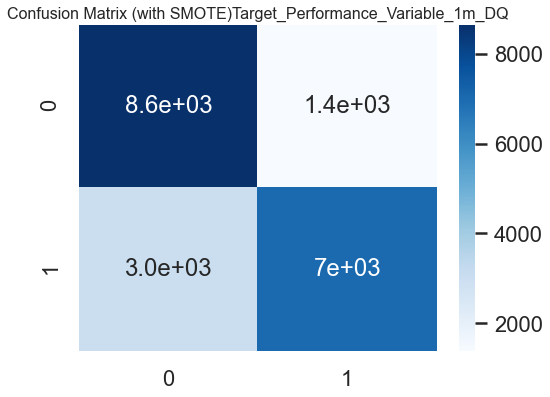

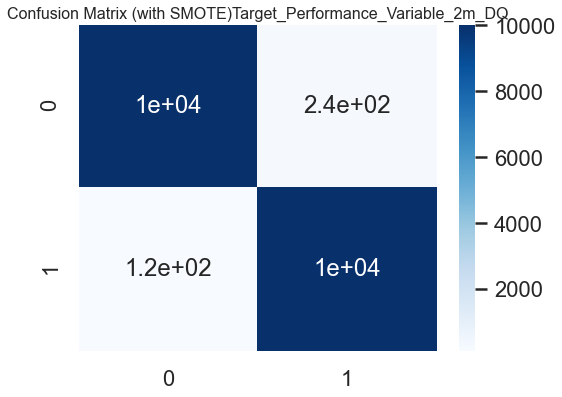

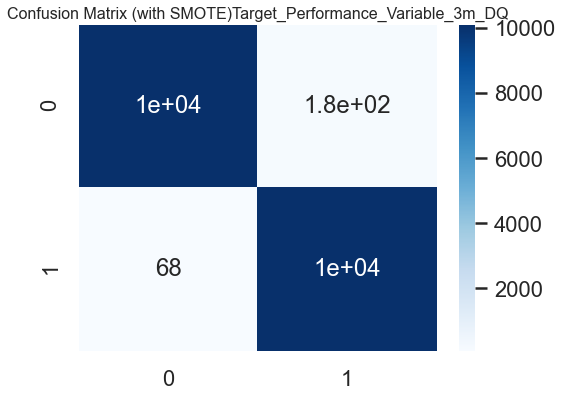

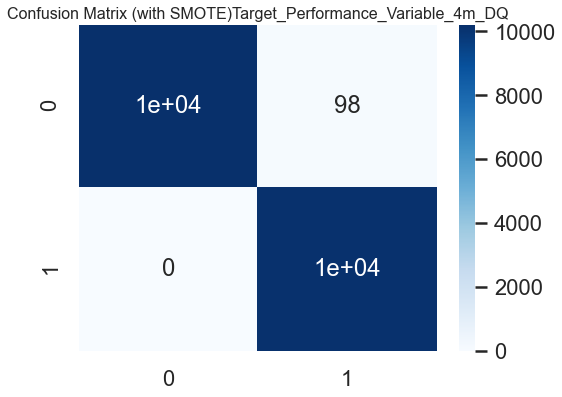

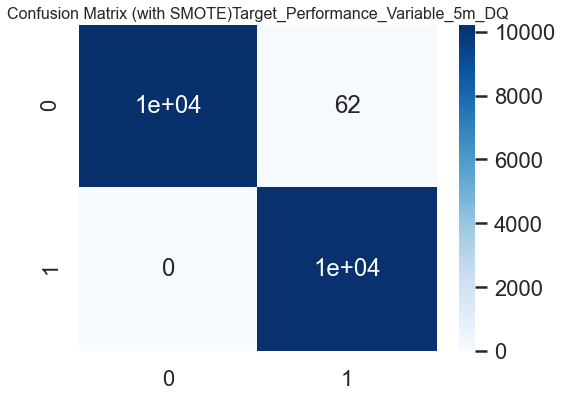

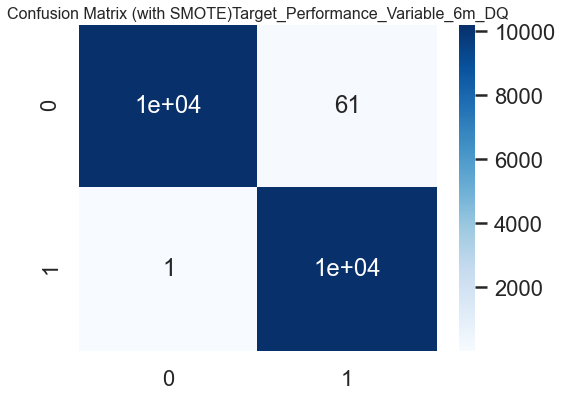

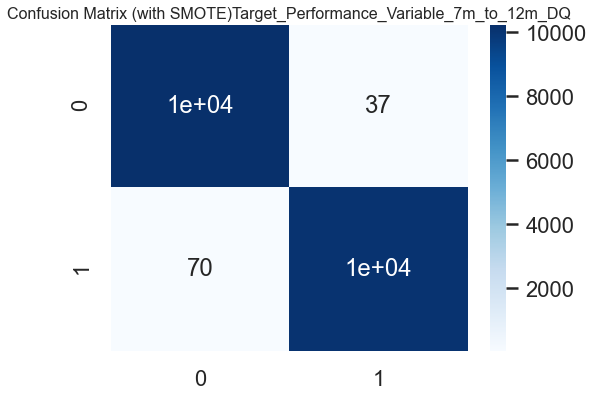

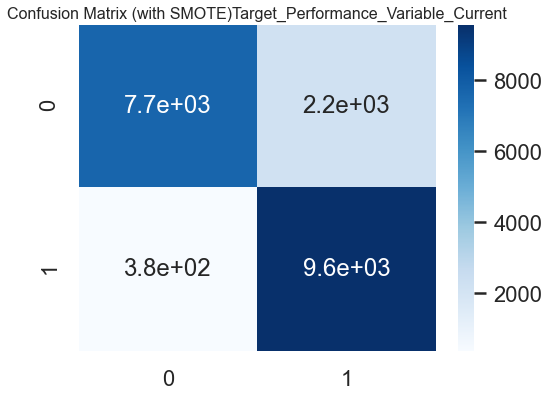

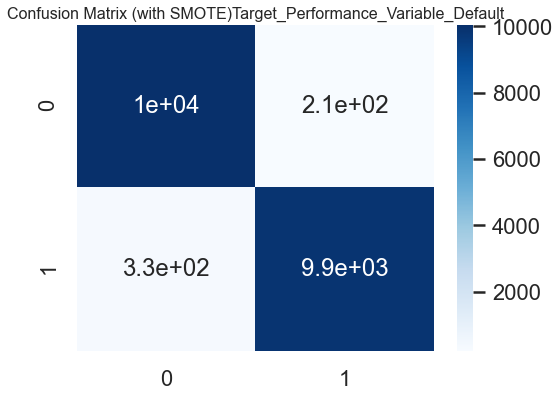

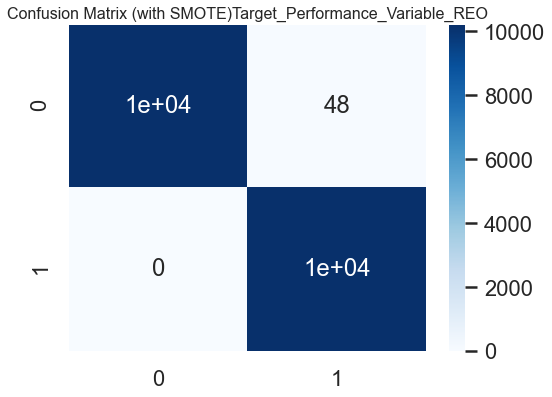

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

X = df.drop(target_variables, axis=1)

for feature in target_variables:
    sm = SMOTE(random_state=123)
    y=df[feature]
    X_sm, y_sm = sm.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.25, random_state=123)
    # Train
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Evaluate
    print(feature)
    print(f'Accuracy = {accuracy_score(y_test, preds):.6f}\nRecall = {recall_score(y_test, preds):.6f}\n')
    print ('_________')
    
    odds = np.exp(model.coef_[0])
    print(pd.DataFrame(odds, 
            X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False))
    print ('_________')
    
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix (with SMOTE)' + feature, size=16)
    sns.heatmap(cm, annot=True, cmap='Blues');